***Importing the required libraries for EDA***

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

***Loading the data into the data frame.***

In [72]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [73]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


***Checking the types of data***


In [74]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [75]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


***Checking for duplicates***


In [77]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (3854, 9)


In [78]:
#removing the duplicates
df = df.drop_duplicates()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [80]:
#checking if duplicates are removed
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


***Dropping the missing or null values.***


In [81]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


No null values are seen in the data

**Checking for data imbalance**

In [82]:
df["diabetes"].value_counts()


diabetes
0    87664
1     8482
Name: count, dtype: int64

In [83]:
df["diabetes"].value_counts(normalize=True) * 100


diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64

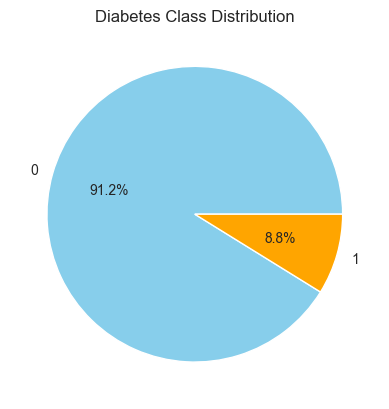

In [84]:
df["diabetes"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "orange"])
plt.title("Diabetes Class Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

**It shows imbalance in data**

# 1. Data Quality and Integrity Check

**To  Examine data for potential outliers and inconsistencies in continuous features such as bmi, blood_glucose_level, and HbA1c_level**

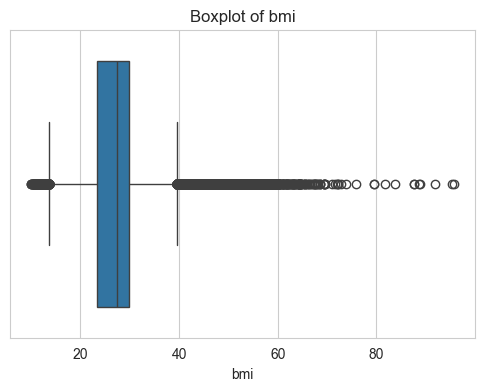

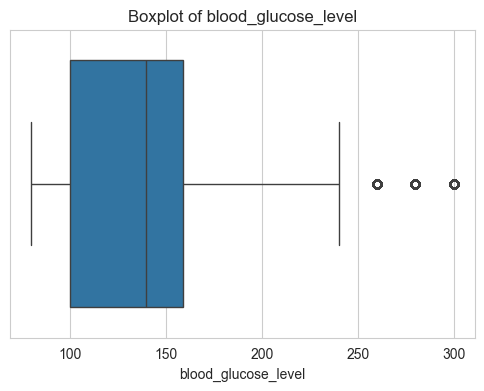

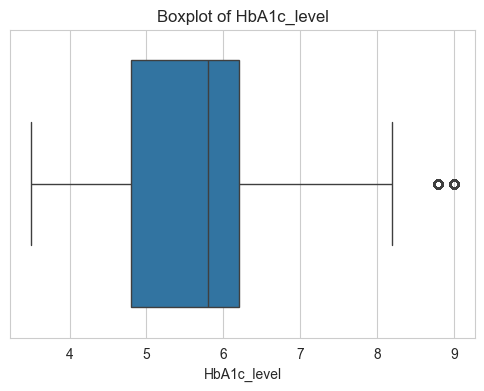

,bmi,blood_glucose_level,HbA1c_level
count,96146.000000,96146.000000,96146.000000
mean,27.321461,138.218231,5.532609
std,6.767716,40.909771,1.073232
min,10.010000,80.000000,3.500000
25%,23.400000,100.000000,4.800000
50%,27.320000,140.000000,5.800000
75%,29.860000,159.000000,6.200000
max,95.690000,300.000000,9.000000


In [85]:
continuous_features = ["bmi", "blood_glucose_level", "HbA1c_level"]

for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

df[continuous_features].describe()

##### This shows that BMI, blood glucose level, and HbA1c level have a wide range, with some extreme values indicating potential outliers. The average BMI (27.32) suggests a tendency towards being overweight. Blood glucose and HbA1c levels have high variability, with some individuals reaching diabetic thresholds.

In [86]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.shape[0]

outliers_bmi = detect_outliers("bmi")
outliers_glucose = detect_outliers("blood_glucose_level")
outliers_hba1c = detect_outliers("HbA1c_level")

print(f"Outliers detected:\nBMI: {outliers_bmi}\nBlood Glucose Level: {outliers_glucose}\nHbA1c Level: {outliers_hba1c}")


Outliers detected:
BMI: 5354
Blood Glucose Level: 2031
HbA1c Level: 1312


##### A significant number of outliers were detected, with 5,354 in BMI, 2,031 in blood glucose levels, and 1,312 in HbA1c levels.

**Investigating the distribution of gender and smoking_history categories.**

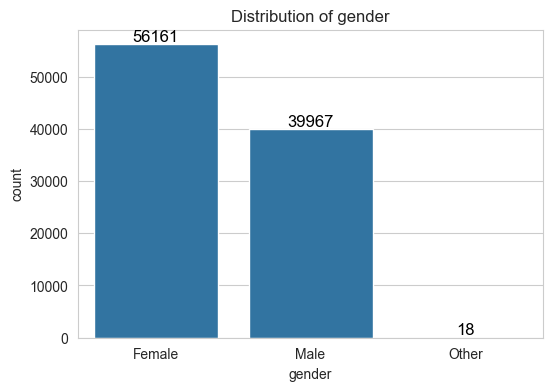

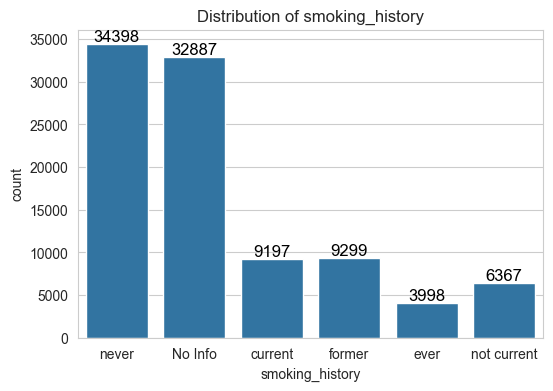

In [87]:
categorical_features = ["gender", "smoking_history"]

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=df[feature])
    
    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.title(f"Distribution of {feature}")
    plt.show()


##### The data primarily consists of individuals who have never smoked.









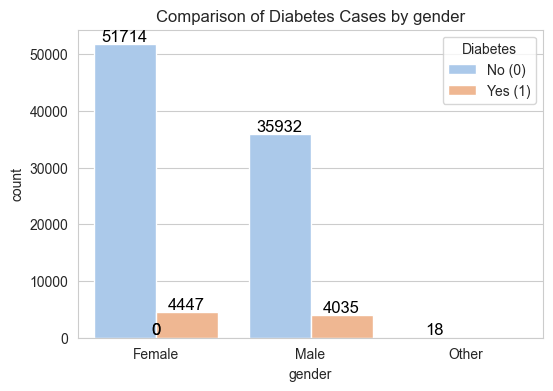

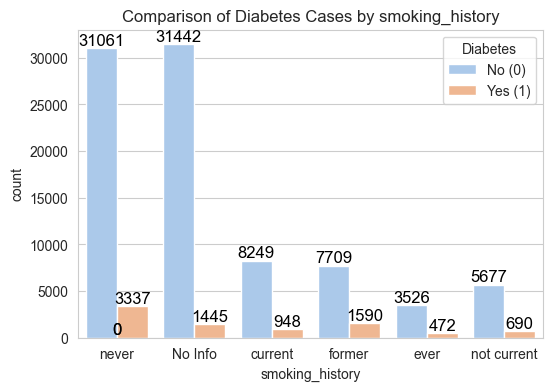

In [88]:
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=df[feature], hue=df["diabetes"], palette="pastel")

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

    plt.title(f"Comparison of Diabetes Cases by {feature}")
    plt.legend(title="Diabetes", labels=["No (0)", "Yes (1)"])
    plt.show()

**Analyzing the class distribution of the target variable (diabetes) to detect class
 imbalance.**

In [89]:
diabetes_counts = df["diabetes"].value_counts()
diabetes_percent = df["diabetes"].value_counts(normalize=True) * 100

In [90]:
diabetes_counts

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [91]:
diabetes_percent

diabetes
0    91.178
1     8.822
Name: proportion, dtype: float64

##### we can see that The dataset is imbalanced, with 91.18% non-diabetic and 8.82% diabetic cases, requiring handling techniques for better predictive modeling accuracy.









# 2. UNIVARIATE ANALYSIS

 **Visualsing the distribution of age, bmi, HbA1c_level, and blood_glucose_level.**

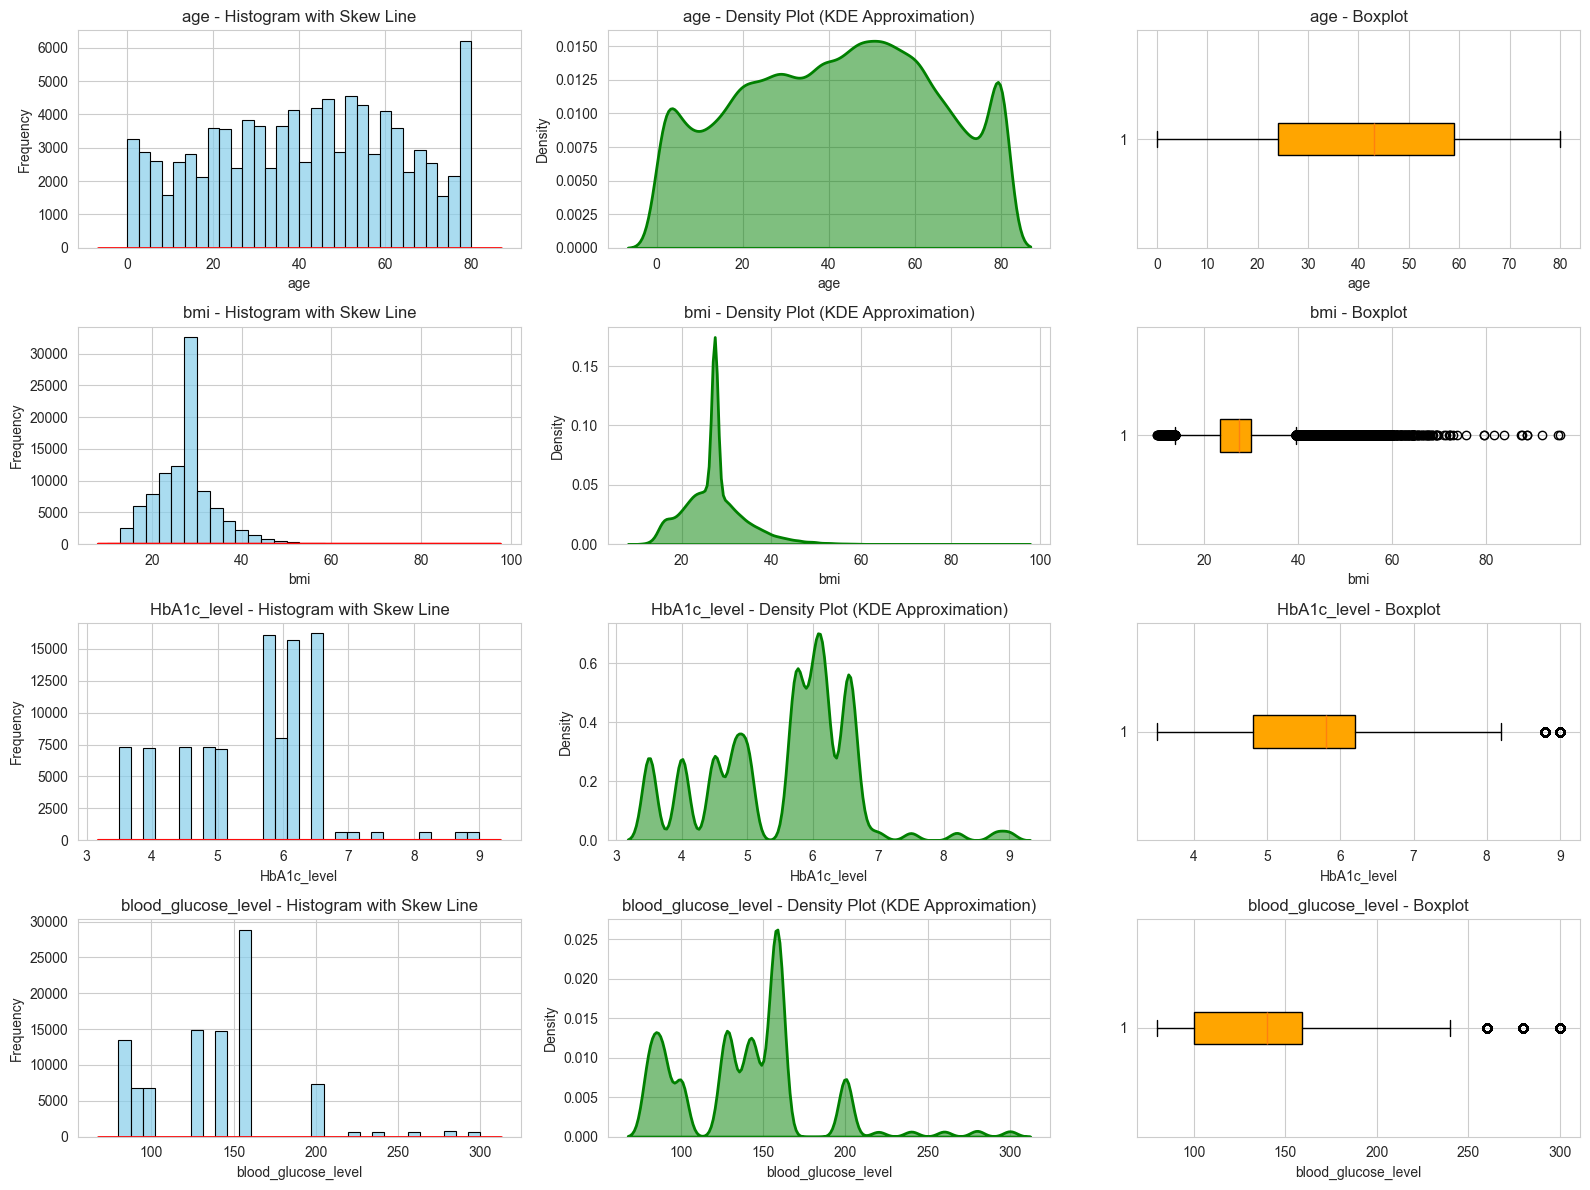

In [92]:
univariate_column = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]

plt.figure(figsize=(16, 12))

for i, col in enumerate(univariate_column, 1):
    plt.subplot(4, 3, (i - 1) * 3 + 1)
    sns.histplot(df[col], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    sns.kdeplot(df[col], color="red", linewidth=2)  # Skew Line
    plt.title(f"{col} - Histogram with Skew Line")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(4, 3, (i - 1) * 3 + 2)
    sns.kdeplot(df[col], color="green", linewidth=2, fill=True, alpha=0.5)
    plt.title(f"{col} - Density Plot (KDE Approximation)")
    plt.xlabel(col)
    plt.ylabel("Density")

    plt.subplot(4, 3, (i - 1) * 3 + 3)
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="orange"))
    plt.title(f"{col} - Boxplot")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### Identifying patterns in the continuous variables and categorizing bmi into standard groups (underweight, normal, overweight, obese)

In [93]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

In [94]:
df = df.copy()  # Ensures you work with an independent copy
df["BMI_Category"] = df["bmi"].apply(categorize_bmi)
df["BMI_Category"].value_counts()

BMI_Category
Overweight     41532
Obese          24342
Normal         21781
Underweight     8491
Name: count, dtype: int64

##### The dataset shows most individuals are overweight (41,532) or obese (24,342), while fewer are normal (21,781) or underweight (8,491).

In [95]:
continuous_vars = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
skewness = df[continuous_vars].skew()

print("\nSkewness of Continuous Variables:")
skewness


Skewness of Continuous Variables:


age                   -0.062445
bmi                    1.023751
HbA1c_level           -0.054463
blood_glucose_level    0.836489
dtype: float64

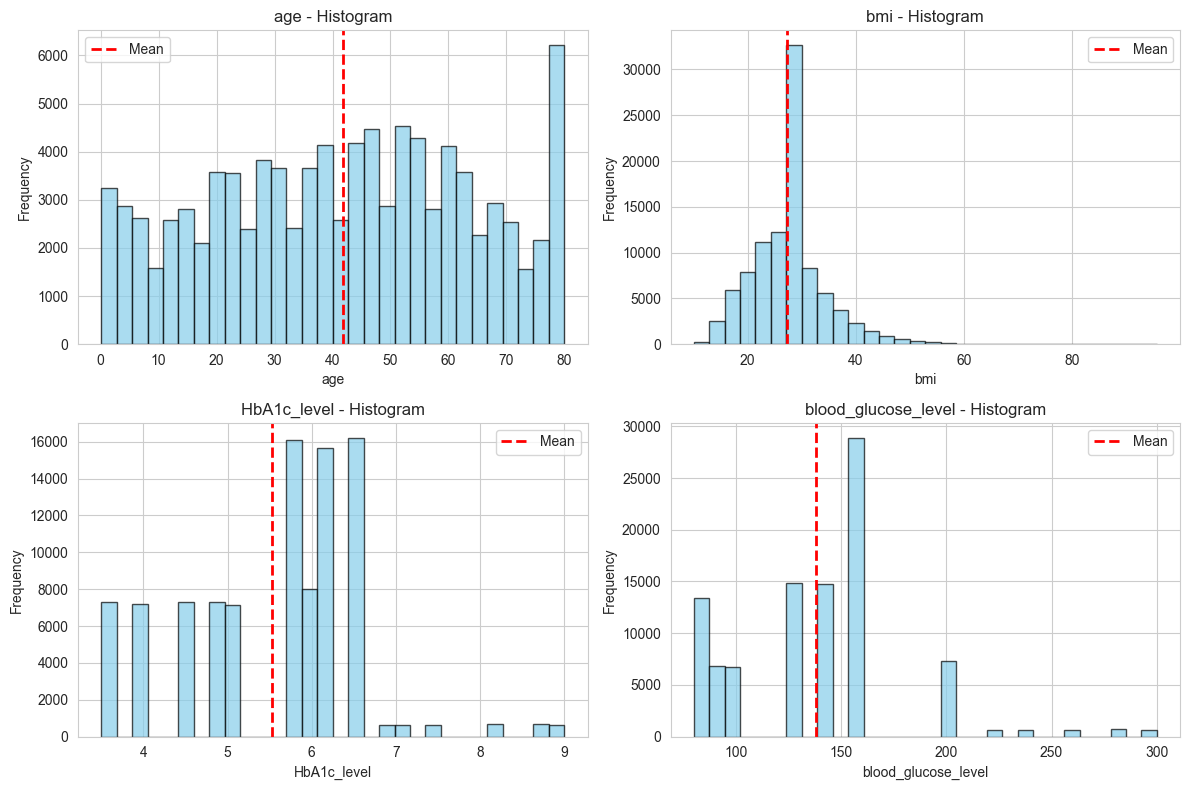

In [96]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
    plt.legend()

plt.tight_layout()
plt.show()


# 3. Bivariate and Multivariate Analysis


### Explore relationships between key features 

### 1. age vs. diabetes

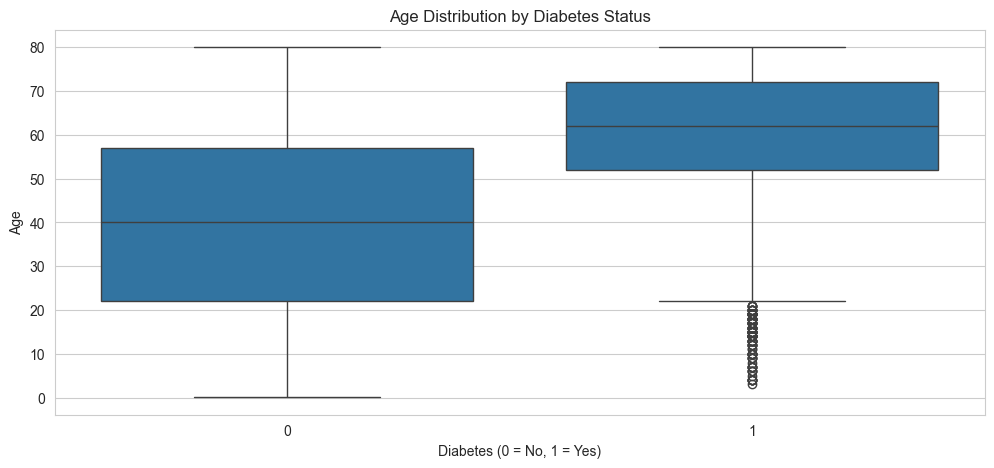

In [97]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["diabetes"], y=df["age"])
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


### 2. bmi vs. diabetes.

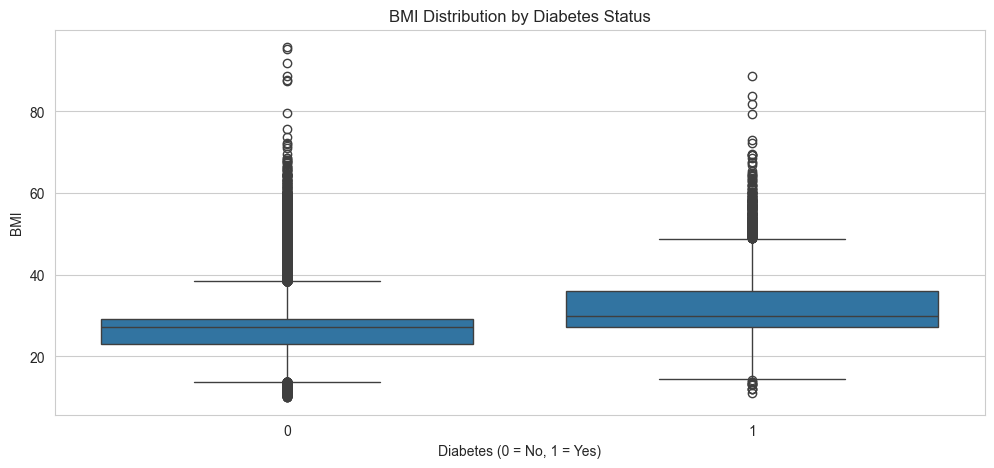

In [98]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["diabetes"], y=df["bmi"])
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

##### Investigating the impact of smoking_history on diabetes prevalence.

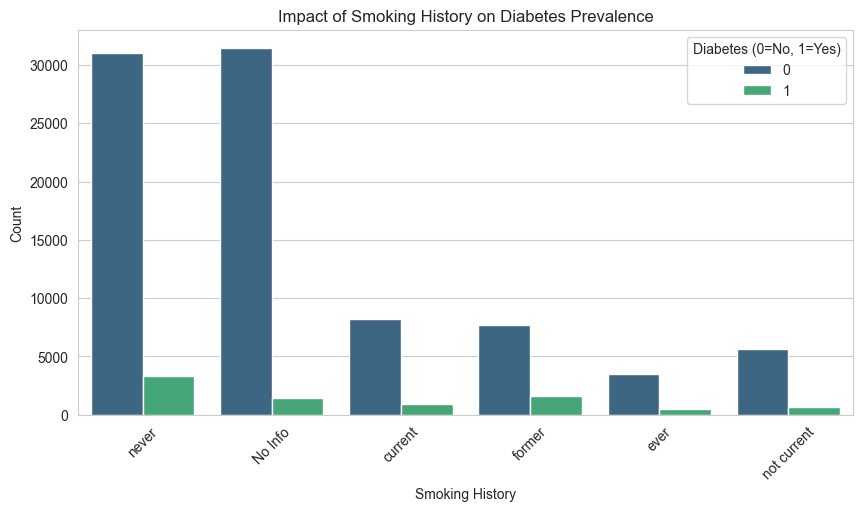

In [99]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.countplot(x=df["smoking_history"], hue=df["diabetes"], palette="viridis")
plt.title("Impact of Smoking History on Diabetes Prevalence")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Diabetes (0=No, 1=Yes)")
plt.show()

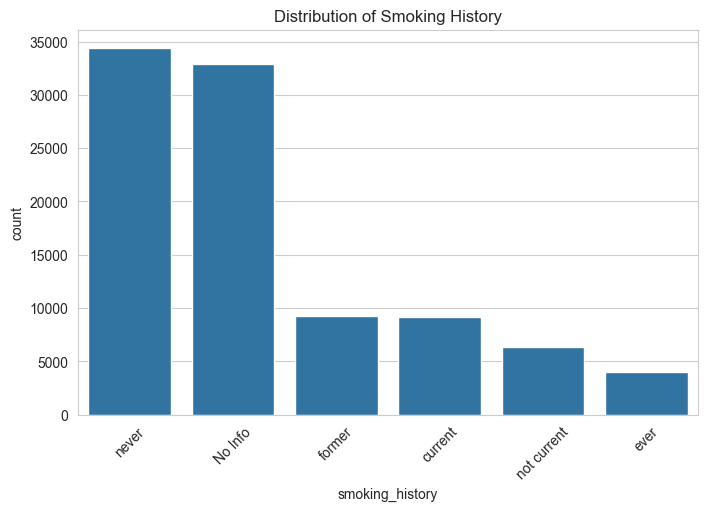

In [100]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["smoking_history"], order=df["smoking_history"].value_counts().index)
plt.title("Distribution of Smoking History")
plt.xticks(rotation=45)
plt.show()

In [101]:
smoking_diabetes = df.groupby("smoking_history")["diabetes"].mean() * 100
print(smoking_diabetes.sort_values(ascending=False))

smoking_history
former         17.098613
ever           11.805903
not current    10.837129
current        10.307709
never           9.701145
No Info         4.393833
Name: diabetes, dtype: float64


##### Former smokers have the highest diabetes rate (17.10%), followed by ever smokers (11.81%). Those with no smoking info have the lowest (4.39%).

In [102]:
import scipy.stats as stats

# 3. Chi-Square Test to Check Statistical Significance
contingency_table = pd.crosstab(df["smoking_history"], df["diabetes"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}")

# Interpretation
if p < 0.05:
    print("Smoking history significantly impacts diabetes prevalence (p < 0.05).")
else:
    print("No significant relationship found between smoking history and diabetes.")

Chi-Square Test Results:
Chi2 Statistic = 1728.32, p-value = 0.0000
Smoking history significantly impacts diabetes prevalence (p < 0.05).


### Corelation heatmap

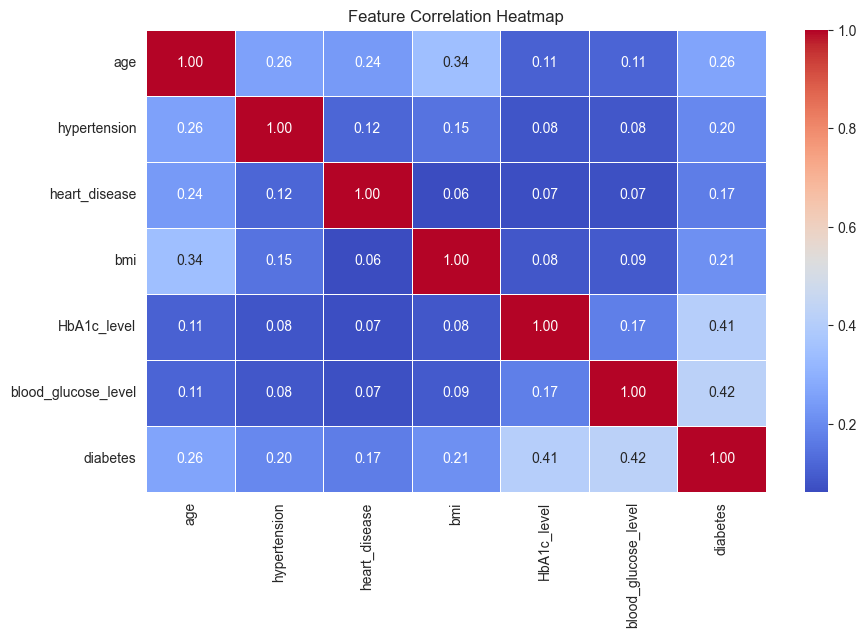

In [103]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### The heatmap visualizes feature correlations, highlighting strong and weak relationships. Key variables influencing diabetes can be identified for better predictive modeling.









# 4. Comorbidity Analysis

###   Studying the co-occurrence of hypertension and heart disease with diabetes and analyzing how the number of comorbidities affects diabetes risk.



In [104]:
comorbidity_diabtes = df.groupby(["hypertension", "heart_disease"])["diabetes"].mean() * 100
comorbidity_diabtes

hypertension  heart_disease
0             0                 6.404286
              1                30.219415
1             0                26.397800
              1                39.125683
Name: diabetes, dtype: float64

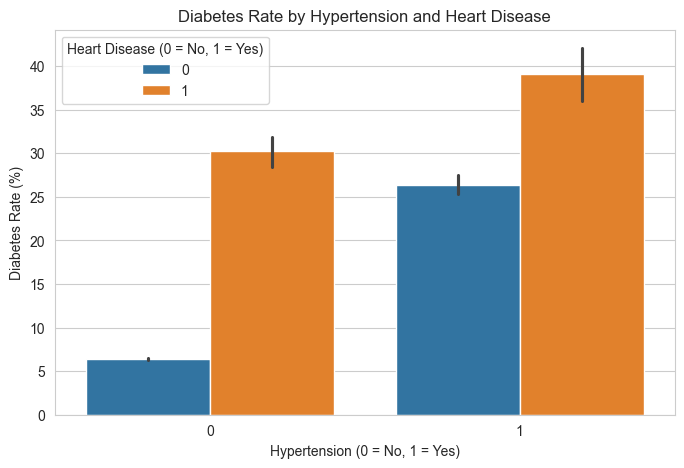

In [105]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="hypertension", y="diabetes", hue="heart_disease", estimator=lambda x: sum(x) / len(x) * 100)
plt.title("Diabetes Rate by Hypertension and Heart Disease")
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()

In [106]:
df.loc[:, "comorbidity_count"] = df["hypertension"] + df["heart_disease"]
comorbidity_impact = df.groupby("comorbidity_count")["diabetes"].mean() * 100
comorbidity_impact

comorbidity_count
0     6.404286
1    27.601005
2    39.125683
Name: diabetes, dtype: float64

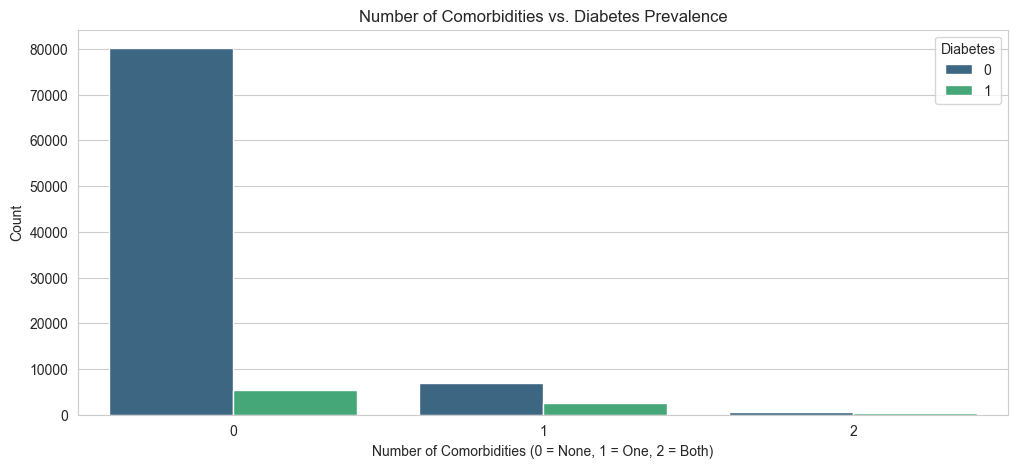

In [107]:
plt.figure(figsize=(12, 5))
sns.countplot(x="comorbidity_count", hue="diabetes", data=df, palette="viridis")
plt.title("Number of Comorbidities vs. Diabetes Prevalence")
plt.xlabel("Number of Comorbidities (0 = None, 1 = One, 2 = Both)")
plt.ylabel("Count")
plt.legend(title="Diabetes")
plt.show()

In [108]:
contingency_table = pd.crosstab(df["comorbidity_count"], df["diabetes"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.2f}, p-value = {p:.4f}")

if p < 0.05:
    print("The number of comorbidities significantly impacts diabetes risk (p < 0.05).")
else:
    print("No significant relationship found between comorbidities and diabetes.")

Chi-Square Test Results:
Chi2 Statistic = 5855.87, p-value = 0.0000
The number of comorbidities significantly impacts diabetes risk (p < 0.05).


##### The chi-square test confirmed that a significant relationship between comorbidities and diabetes risk (**χ² = 5855.87, p < 0.05**), indicating comorbidities strongly influence diabetes likelihood.

# 5. Gender and Health Outcome Disparities


### Comparing diabetes prevalence across different gender categories (Female, Male,Other).

In [109]:
gender_diabetes = df.groupby("gender")["diabetes"].mean() * 100
gender_diabetes

gender
Female     7.918306
Male      10.095829
Other      0.000000
Name: diabetes, dtype: float64

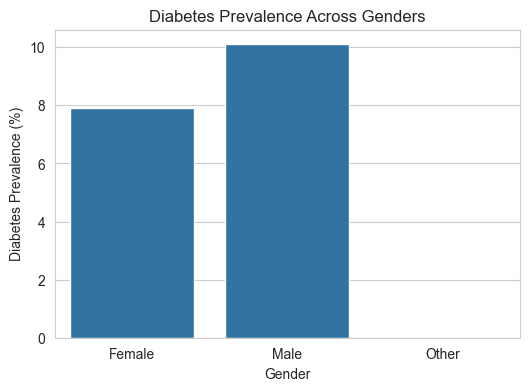

In [110]:
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_diabetes.index, y=gender_diabetes.values)
plt.xlabel("Gender")
plt.ylabel("Diabetes Prevalence (%)")
plt.title("Diabetes Prevalence Across Genders")
plt.show()

##### We see Males have a higher diabetes prevalence compared to other gender categories.









In [111]:
from scipy.stats import chi2_contingency

gender_diabetes_ct = pd.crosstab(df["gender"], df["diabetes"])

# Perform chi-square test
chi2_stat, p, dof, expected = chi2_contingency(gender_diabetes_ct)

print(f"Chi2 Statistic = {chi2_stat:.2f}, p-value = {p:.4f}")

# Interpretation
if p < 0.05:
    print("Significant difference in diabetes prevalence across genders.")
else:
    print("No significant difference in diabetes prevalence across genders.")

Chi2 Statistic = 139.39, p-value = 0.0000
Significant difference in diabetes prevalence across genders.


##### The Chi-Square test confirms a significant difference in diabetes prevalence across genders, meaning gender is an important factor influencing diabetes risk.

###  Look for significant differences in health outcomes based on gender.


##### comparing with variables like BMI, blood glucose level, and HbA1c level to see if they differ across gender categories.

In [112]:
health_metrics = ["bmi", "blood_glucose_level", "HbA1c_level"]

gender_health_outcomes = df.groupby("gender")[health_metrics].agg(["mean", "std"])
gender_health_outcomes

bmi           blood_glucose_level            HbA1c_level  \
             mean       std                mean        std        mean   
gender                                                                   
Female  27.455563  7.055909          137.602625  40.279194    5.514590   
Male    27.132997  6.336189          139.082718  41.768298    5.557985   
Other   27.379444  6.420016          139.444444  33.380555    5.405556   

                  
             std  
gender            
Female  1.065569  
Male    1.083397  
Other   1.135767

##### From the above table we can conclude that Males have higher blood glucose and HbA1c levels, females show more BMI variation, and the "Other" category has lower HbA1c.

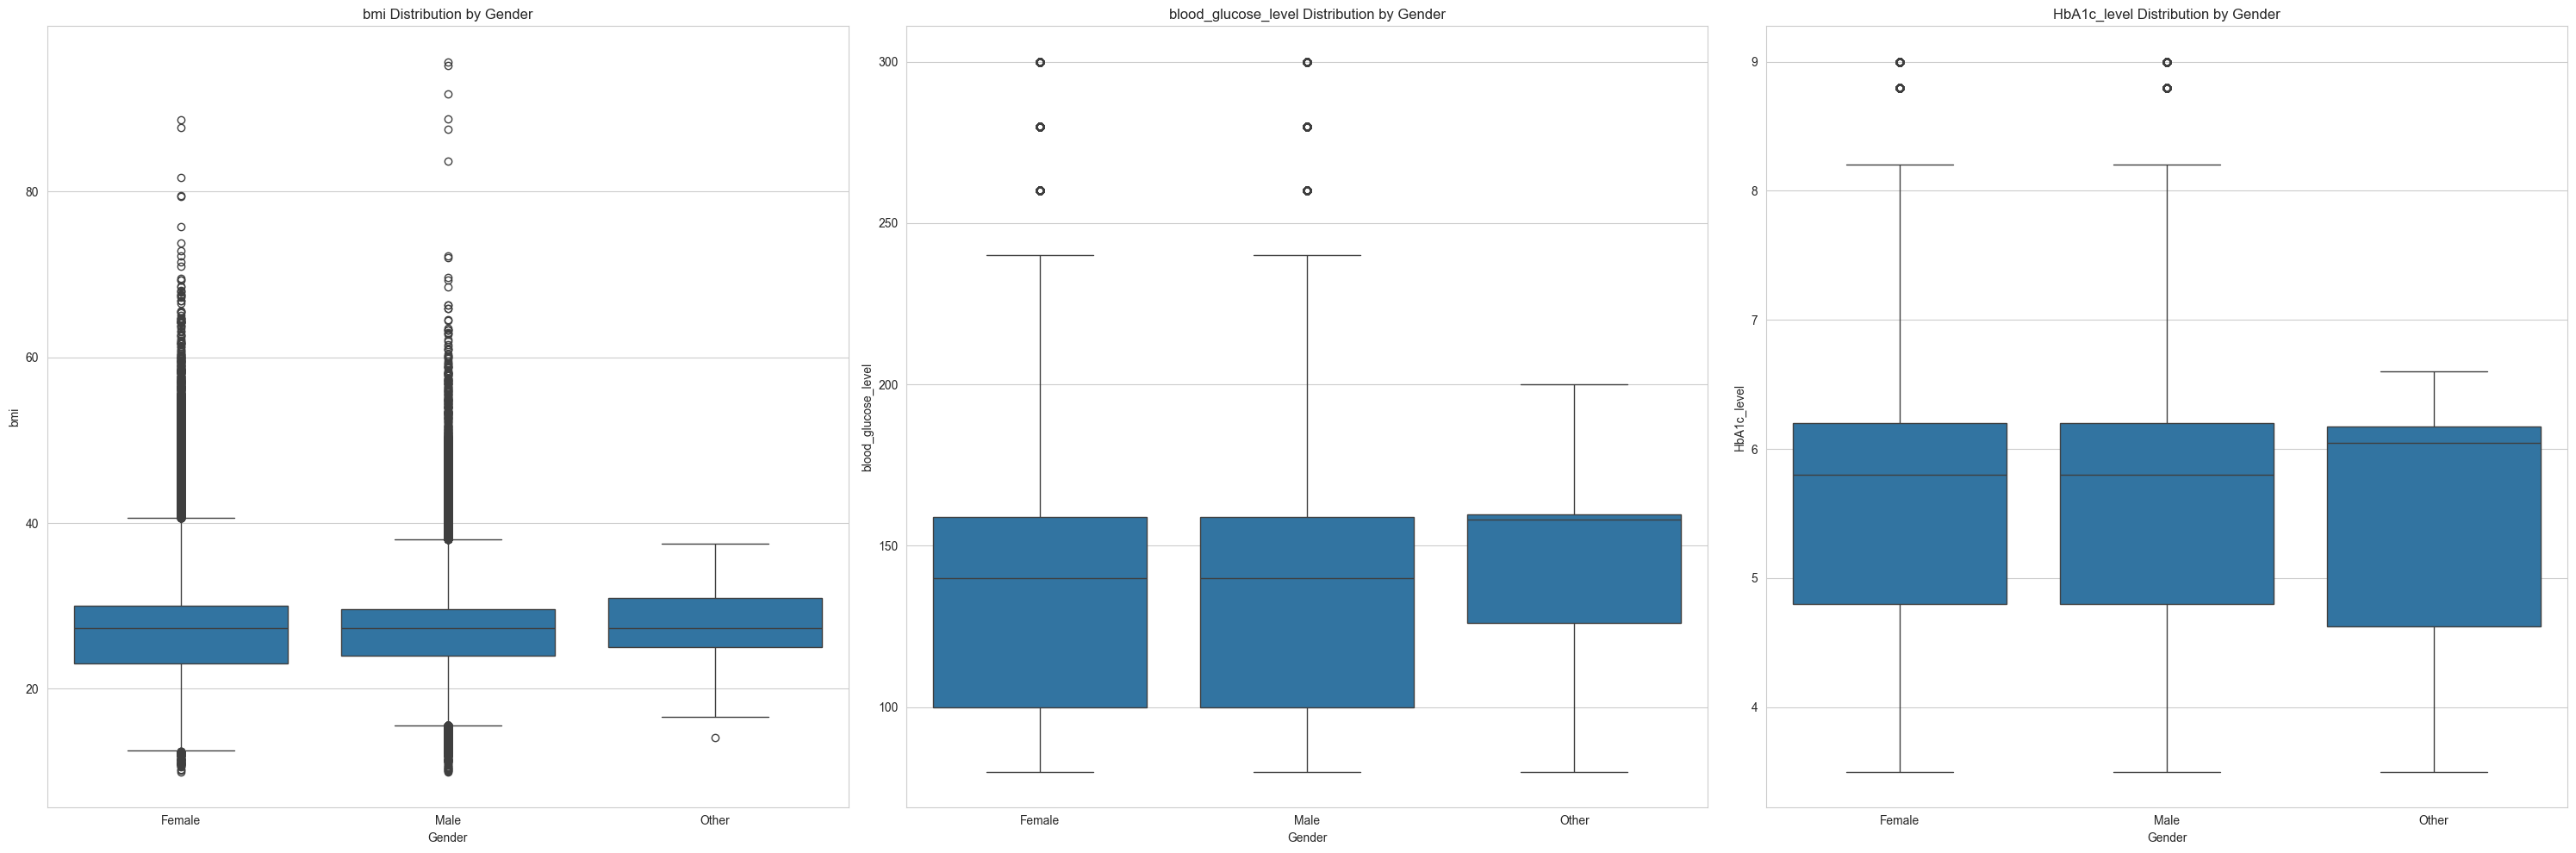

In [113]:
plt.figure(figsize=(30, 10))
for i, col in enumerate(health_metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="gender", y=df[col], data=df)
    plt.title(f"{col} Distribution by Gender")
    plt.xlabel("Gender")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# 6. Anomaly Detection and Risk Stratification


##### Identifying anomalies in health indicators like extremely high bmi or blood


In [114]:
health_indicators = ["bmi", "blood_glucose_level", "HbA1c_level"]


##### Identify Anomalies Using IQR (Interquartile Range)


In [115]:
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [116]:
for col in health_indicators:
    outliers = detect_outliers(col)
    print(f"\nOutliers in {col}:")
    print(outliers[[col]].describe())


Outliers in bmi:
               bmi
count  5354.000000
mean     42.769042
std      10.262465
min      10.010000
25%      40.820000
50%      43.175000
75%      47.010000
max      95.690000

Outliers in blood_glucose_level:
       blood_glucose_level
count          2031.000000
mean            280.384047
std              16.043359
min             260.000000
25%             260.000000
50%             280.000000
75%             300.000000
max             300.000000

Outliers in HbA1c_level:
       HbA1c_level
count  1312.000000
mean      8.899390
std       0.100036
min       8.800000
25%       8.800000
50%       8.800000
75%       9.000000
max       9.000000


##### These outliers indicate severe obesity and poor glucose control, increasing the risk of diabetes and cardiovascular diseases.

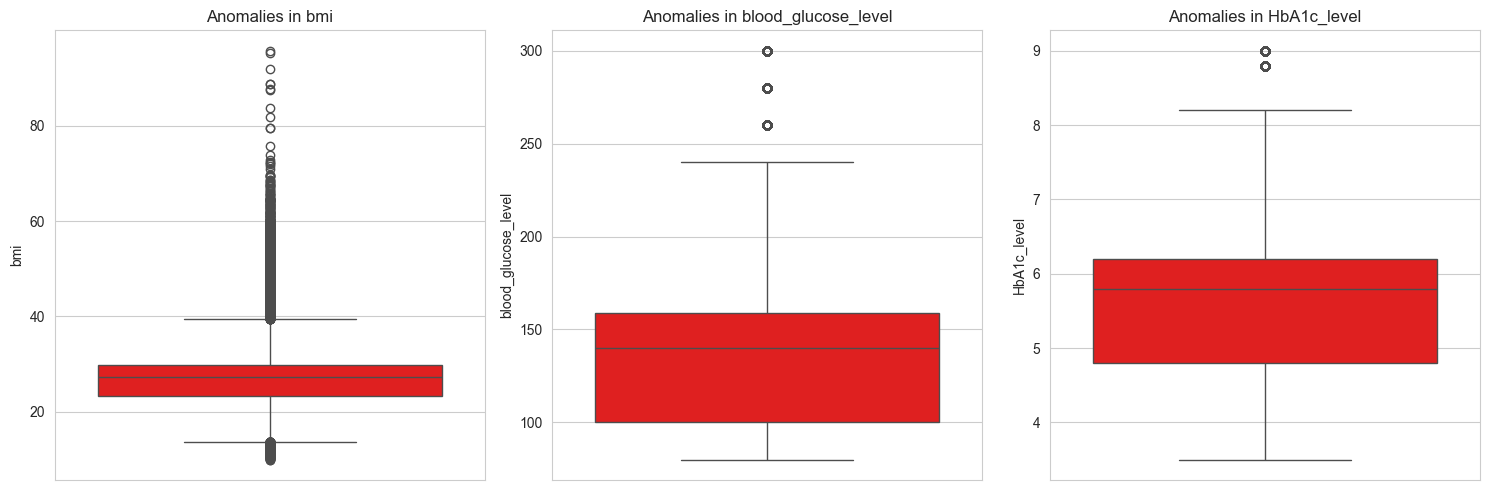

In [117]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(health_indicators, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color="red")
    plt.title(f"Anomalies in {col}")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Creating health risk profiles using combinations of age, bmi, and HbA1c


##### The risk_profile function to categorize individuals into different health risk levels based on their BMI, HbA1c level, and age. This helps in profiling individuals for diabetes or other health risks.

In [118]:
def risk_profile(row):
    if row["bmi"] > 30 and row["HbA1c_level"] > 6.5 and row["age"] > 50:
        return "High Risk"
    elif row["bmi"] > 25 and row["HbA1c_level"] > 5.7:
        return "Moderate Risk"
    else:
        return "Low Risk"

df.loc[:, "Health_Risk_Profile"] = df.apply(risk_profile, axis=1)


In [119]:
df["Health_Risk_Profile"].value_counts()


Health_Risk_Profile
Low Risk         60296
Moderate Risk    33436
High Risk         2414
Name: count, dtype: int64

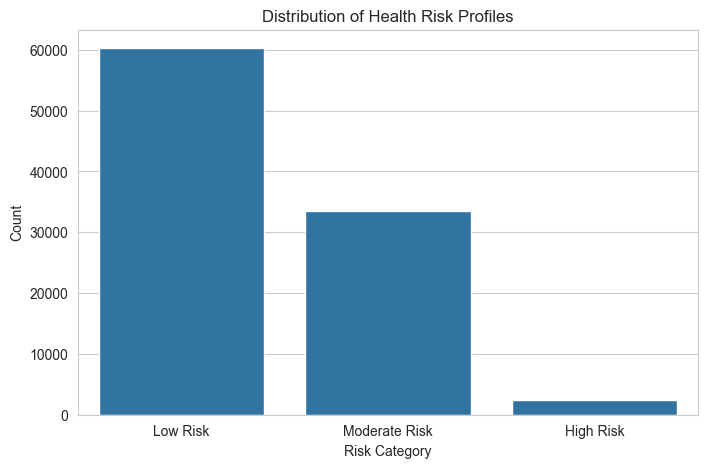

In [120]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Health_Risk_Profile", data=df, order=["Low Risk", "Moderate Risk", "High Risk"])
plt.title("Distribution of Health Risk Profiles")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

##### The majority (60,296 individuals) are in the Low-Risk category, indicating safer BMI, HbA1c, and age levels, while 33,436 individuals fall into the Moderate-Risk category, requiring lifestyle monitoring due to slightly elevated levels. A smaller group (2,414 individuals) is at High Risk, with significantly high BMI, HbA1c, and age over 50, making them more susceptible to diabetes and related complications.

 # 7. Feature Engineering Opportunities


### Developing age groups (e.g., 0–20, 21–40, 41–60, 61+) and categorize bmi.


##### Categorize Age Groups


In [121]:
def categorize_age(age):
    if age <= 20:
        return "0-20"
    elif age <= 40:
        return "21-40"
    elif age <= 60:
        return "41-60"
    else:
        return "61+"


In [122]:
df.loc[:, "Age_Group"] = df["age"].apply(categorize_age)
df["Age_Group"]

0          61+
1        41-60
2        21-40
3        21-40
4          61+
         ...  
99994    21-40
99996     0-20
99997      61+
99998    21-40
99999    41-60
Name: Age_Group, Length: 96146, dtype: object

##### Categorize BMI


In [123]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df.loc[:, "BMI_Category"] = df["bmi"].apply(categorize_bmi)
df["BMI_Category"]

0         Overweight
1         Overweight
2         Overweight
3             Normal
4             Normal
            ...     
99994         Normal
99996    Underweight
99997     Overweight
99998          Obese
99999         Normal
Name: BMI_Category, Length: 96146, dtype: object

##### Creating a Composite Risk Score (Simple Sum of Key Health Factors) and  Generating interaction terms such as age * bmi and bmi * HbA1c



In [124]:
df["Risk_Score"] = df["bmi"] * 0.3 + df["HbA1c_level"] * 0.4 + df["blood_glucose_level"] * 0.3
df["Age_BMI_Interaction"] = df["age"] * df["bmi"]
df["BMI_HbA1c_Interaction"] = df["bmi"] * df["HbA1c_level"]


In [125]:
print(df.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes BMI_Category  comorbidity_count  \
0          6.6                  140         0   Overweight                  1   
1          6.6                   80         0   Overweight                  0   
2          5.7                  158         0   Overweight                  0   
3          5.0                  155         0       Normal                  0   
4          4.8                  155         0       Normal                  2   

  Health_Risk_Profile Age_Group  Risk_Score  Age_BMI_Interaction  \
0       Moderate R

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 96146 non-null  object 
 1   age                    96146 non-null  float64
 2   hypertension           96146 non-null  int64  
 3   heart_disease          96146 non-null  int64  
 4   smoking_history        96146 non-null  object 
 5   bmi                    96146 non-null  float64
 6   HbA1c_level            96146 non-null  float64
 7   blood_glucose_level    96146 non-null  int64  
 8   diabetes               96146 non-null  int64  
 9   BMI_Category           96146 non-null  object 
 10  comorbidity_count      96146 non-null  int64  
 11  Health_Risk_Profile    96146 non-null  object 
 12  Age_Group              96146 non-null  object 
 13  Risk_Score             96146 non-null  float64
 14  Age_BMI_Interaction    96146 non-null  float64
 15  BMI_HbA

# EDA SUMMARY

The dataset reveals key health indicators influencing diabetes risk. Males show a higher diabetes prevalence than females. Outliers exist in BMI, glucose, and HbA1c levels. Smoking history and comorbidities significantly impact diabetes risk. Feature engineering, including age groups, BMI categories, and interaction terms, enhances predictive modeling.